<a href="https://colab.research.google.com/github/JidnyasaKolhe/DataVizFall2020_Colab/blob/master/Copy_of_Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fl

In [ ]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)

# Explore data

In [ ]:
df.head(5)

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [ ]:
df.nunique

<bound method DataFrame.nunique of               date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
521529  2020-09-10  Sweetwater     Wyoming  56037.0    319       2
521530  2020-09-10       Teton     Wyoming  56039.0    453       1
521531  2020-09-10       Uinta     Wyoming  56041.0    310       2
521532  2020-09-10    Washakie     Wyoming  56043.0    110       6
521533  2020-09-10      Weston     Wyoming  56045.0     21       0

[521534 rows x 6 columns]>

In [ ]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
df_Bfips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0]
df_Bfips



25005.0

In [ ]:
df_Sfips = df[(df['county']== 'Suffolk') & (df['state'] == 'Massachusetts')]['fips'].unique()[0]
df_Sfips

25025.0

In [ ]:
print(f'Bristol_fips =',df_Bfips)
print(f'Suffolk_fips =',df_Sfips)

Bristol_fips = 25005.0
Suffolk_fips = 25025.0


In [ ]:
def get_county_stat(df,fips):
  a = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  a.set_index('date',inplace=True)
  a.index = pd.to_datetime(a.index)
  return a

get_county_stat(df,df_Bfips).head()

county          state  cases  deaths
date                                             
2020-03-14  Bristol  Massachusetts      1       0
2020-03-15  Bristol  Massachusetts      1       0
2020-03-16  Bristol  Massachusetts      2       0
2020-03-17  Bristol  Massachusetts      5       0
2020-03-18  Bristol  Massachusetts      5       0

## Explore data type

In [ ]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

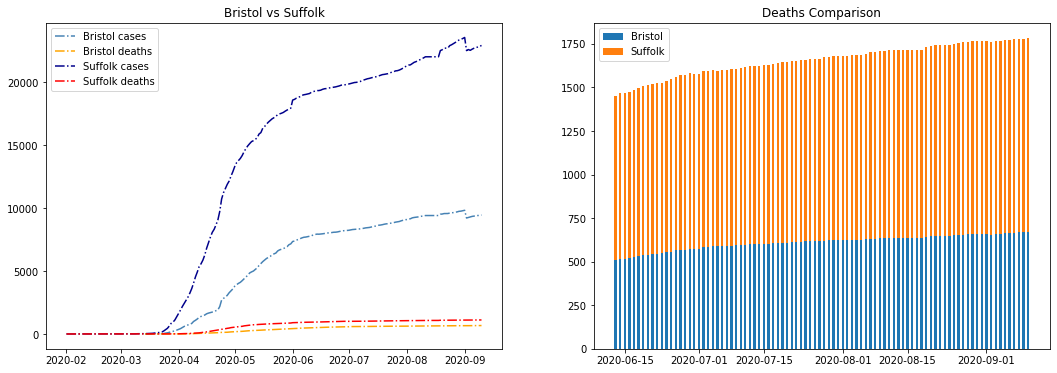

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color='steelblue',label='Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,'-.',color='orange',label='Bristol deaths')

ax[0].plot(df_Suffolk.index,df_Suffolk.cases,'-.',color='darkblue',label='Suffolk cases')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,'-.',color='red',label='Suffolk deaths')

width = 0.5
past= -90
p1 = ax[1].bar(df_Bristol.index[past:], df_Bristol.deaths[past:],width,label='Bristol')
p2 = ax[1].bar(df_Suffolk.index[past:], df_Suffolk.deaths[past:],width,bottom=df_Bristol.deaths[past:],label='Suffolk')
ax[0].set_title('Bristol vs Suffolk')
ax[1].set_title('Deaths Comparison')
ax[0].legend()
ax[1].legend()


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [29]:
df.sort_values(['date'])
df['daily_cases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['daily_cases'] = df['daily_cases'].rolling(window=3).max()

df['daily_deaths'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['daily_deaths'] = df['daily_deaths'].rolling(window=3).max()

sorted = df
sorted = df.groupby(['fips','county'],as_index = False).sum()

toptenC = sorted[['county','daily_cases','daily_deaths']].sort_values(['daily_cases','daily_deaths'],ascending=False).head(10)
toptenC

county  daily_cases  daily_deaths
201  Los Angeles     251024.0        6129.0
203        Marin     251023.0        6128.0
202       Madera     251011.0        6128.0
358   Miami-Dade     162893.0        2803.0
360       Nassau     162892.0        2790.0
359       Monroe     162792.0        2791.0
100     Maricopa     136571.0        3143.0
102       Navajo     136563.0        3157.0
101       Mohave     136320.0        3148.0
605         Cook     132976.0        5104.0

## Death rate Per FIPS 

In [35]:
sorted['Death_rate'] = sorted['daily_deaths']/sorted['daily_cases']*100
sorted['newDeathRate']= sorted['Death_rate'].round(decimals=1)
dr = sorted[['fips','newDeathRate']]
dr

fips  newDeathRate
0      1001.0           2.0
1      1003.0           1.4
2      1005.0           1.4
3      1007.0           1.1
4      1009.0           1.4
...       ...           ...
3200  72151.0           0.0
3201  72153.0           0.0
3202  78010.0           1.8
3203  78020.0           1.7
3204  78030.0           1.7

[3205 rows x 2 columns]

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [69]:
LocGeo = 'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json'
map = fl.Map(location=[37,-102],zoom_start=2)
df_temp=df.dropna(subset = ['fips'])

df_temp['fips']=df_temp['fips'].astype(int)
df_temp['fips']=df_temp['fips'].astype(str)
temp=df_temp[['fips','daily_cases']].groupby('fips',as_index=False).sum()

#print(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
fl.Choropleth(
  geo_data= LocGeo,
  name='choropleth',
  data=temp,
  columns=['fips','daily_cases'],
  key_on='feature.id',
  fill_color='OrRd',
  fill_opacity=0.5,
  line_opacity=0.2,
  legend_name='daily_cases'
).add_to(map)
fl.LayerControl().add_to(map)
map